# Training Session 3

The focus in the third training session will be looking into data augmentation.
Additionally, we will have a look at another model, the U_Net.

Finally we will repeat some steps from our secound session to submit our results.

### Recap from the second session:
* Installed requirements and imported libraries
* Looked into directory set-up, available data
* Loaded and briefly looked into data
* Configured a Mask-RCNN model
* Trained MRCNN on the available data
* Ran the model on our test set
* Transformed the model output into the needed format for submission
* "Submitted" our results to the user folder

### Installing libraries and notebooks

In [0]:
%pip install -r '/dbfs/mnt/sdscdata/requirements.txt'

Python interpreter will be restarted.
Requirement already satisfied: keras-nightly==2.5.0.dev2021032900 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 1)) (2.5.0.dev2021032900)
Requirement already satisfied: tensorflow==2.5.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 2)) (2.5.0)
Requirement already satisfied: scikit-image==0.17.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 3)) (0.17.2)
Requirement already satisfied: scikit-learn==0.24.1 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 4)) (0.24.1)
Requirement already satisfied: labelme==4.5.9 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (4.5.9)
Requirement already satisfied: pycocotools==2.0.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 6)) (2.0.2)
Requirement already satisfied: scipy==1.6.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 7)) (1.6.2)
Requirement already satisfied: tqdm==4.62.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 8)) (4.62.2)
Requirement already satisfied: h5py==3.1.0 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 9)) (3.1.0)
Requirement already satisfied: numpy==1.19.2 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 10)) (1.19.2)
Requirement already satisfied: pandas==1.2.4 in /databricks/python3/lib/python3.8/site-packages (from -r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (1.2.4)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.4.1)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme==4.5.9->-r /dbfs/mnt/sdscdata/requirements.txt (line 5)) (5.15.5)
Requirement already satisfied: pytz>=2017.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2020.5)
Requirement already satisfied: python-dateutil>=2.7.3 in /databricks/python3/lib/python3.8/site-packages (from pandas==1.2.4->-r /dbfs/mnt/sdscdata/requirements.txt (line 11)) (2.8.1)
Requirement already satisfied: setu

In [0]:
%pip install scikit-multilearn

Python interpreter will be restarted.
Requirement already satisfied: scikit-multilearn in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (0.2.0)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

In [0]:
import numpy as np
import keras

import tensorflow as tf
from tensorflow.python.keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import keras.backend as K
from keras.models import Model
from keras.layers import Input, BatchNormalization, Activation, Dropout
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from keras.layers.pooling import MaxPooling2D
from keras.layers.merge import concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.python.keras.models import load_model

import skimage
from skimage.io import imread
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import datetime
import os
import pandas as pd
import random

In [0]:
%run ./helpers

In [0]:
%run ./labelme

In [0]:
%run ./custom_functions

In [0]:
# loading the scores and the weather station data again, as we need it for submitting our results
label_scores = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/label_scores.csv', sep=';')
labels = list(label_scores.labels.values)
# SA --> mean of the yearly sum of hours of sun over the last years
weather = pd.read_csv('/dbfs/mnt/sdscdata/data/raw/weather_station_file.csv', sep=',')


Python interpreter will be restarted.
Requirement already satisfied: labelme in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (4.5.9)
Requirement already satisfied: matplotlib<3.3 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme) (3.2.2)
Requirement already satisfied: Pillow>=2.8.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme) (8.4.0)
Requirement already satisfied: PyYAML in /databricks/python3/lib/python3.8/site-packages (from labelme) (5.4.1)
Requirement already satisfied: imgviz>=0.11.0 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme) (1.4.1)
Requirement already satisfied: numpy in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.19.2)
Requirement already satisfied: qtpy in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme) (1.11.2)
Requirement already satisfied: termcolor in /databricks/python3/lib/python3.8/site-packages (from labelme) (1.1.0)
Requirement already satisfied: PyQt5!=5.15.3,!=5.15.4 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from labelme) (5.15.5)
Requirement already satisfied: kiwisolver>=1.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (1.3.1)
Requirement already satisfied: python-dateutil>=2.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.8.1)
Requirement already satisfied: cycler>=0.10 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (0.10.0)
Requirement already satisfied: pyparsing!=2.0.4,!=2.1.2,!=2.1.6,>=2.0.1 in /databricks/python3/lib/python3.8/site-packages (from matplotlib<3.3->labelme) (2.4.7)
Requirement already satisfied: six in /databricks/python3/lib/python3.8/site-packages (from cycler>=0.10->matplotlib<3.3->labelme) (1.15.0)
Requirement already satisfied: PyQt5-sip<13,>=12.8 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (12.9.0)
Requirement already satisfied: PyQt5-Qt5>=5.15.2 in /local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/lib/python3.8/site-packages (from PyQt5!=5.15.3,!=5.15.4->labelme) (5.15.2)
WARNING: You are using pip version 21.0.1; however, version 21.3.1 is available.
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f532ca8f-050e-4ab6-affb-4b588b8d6e79/bin/python -m pip install --upgrade pip' command.
Python interpreter will be restarted.

### Set directories

Also similary to the second session, lets define our Team Path and some directories

In [0]:
TEAM_MOUNT = '/dbfs/mnt/team32storage/'

# Train
IMAGES_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/JPEGImages')
MASKS_DIR_TRAIN = Path(TEAM_MOUNT + 'data/processed/train/SegmentationClassPNG')
# VAL
IMAGES_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/JPEGImages')
MASKS_DIR_VAL = Path(TEAM_MOUNT + 'data/processed/val/SegmentationClassPNG')

IMAGE_SIZE = 512

Last time we loaded the masks from the annotations.json file. This time we want to use the png masks to make it easier for us to increase our data. _(Of course both options can be used for both models as long as the the load functions are adapted accordingly)_

To match the colors in the png format to different classes we define them below:

In [0]:
colors = {# 0: (0, 0, 0), # BG
            1:  (128, 0, 0), # asphalt
            2:  (0, 128, 0), # sealed_other 
            3:  (128, 128, 0), # gravel_clay 
            4:  (0, 0, 128), # field 
            5:  (128, 0, 128), # water 
            6:  (0, 128, 128), # meadow 
            7:  (128, 128, 128), # lawn 
            8:  (64, 0, 0), # pool 
            9:  (192, 0, 0), # roof_other 
            10: (64, 128, 0), # roof_flat_residential 
            11: (192, 128, 0), # roof_pitched_industrial 
            12: (64, 0, 128), # roof_flat_industrial 
            13: (192, 0, 128), # roof_pitched_residental 
            14: (64, 128, 128), # hedge 
            15: (192, 128, 128), # tree_group
            16: (0, 64, 0), # tree 
            17: (128, 64, 0), # vehicle
                } 

n_labels = len(colors)

### Splitting the data

In [0]:
train_jpg = []
train_json = []
for file in dbutils.fs.ls("/mnt/sdscdata/data/raw/train"):
  if(file.name[-4:] == 'jpeg'):
    train_jpg.append(file.name)
  if(file.name[-4:] == 'json'):
    train_json.append(file.name)

In [0]:
rows = []
columns = ['file name', 'collision_ratio']
for label in labels:
  columns.append(label+'_ratio')

for i in range(len(train_json)):
  json_path = Path('/dbfs/mnt/sdscdata/data/raw/train/', train_json[i])
  img_mask = mask_from_json(json_path)
  
  row = [train_json[i]]
  row.append(collision_ratio(img_mask))
  for label in labels:
    row.append(get_label_ratio(img_mask, label))
  rows.append(row)

df = pd.DataFrame(rows, columns=columns)

In [0]:
from skmultilearn.model_selection import iterative_train_test_split
X_train, y_train, X_test, y_test = iterative_train_test_split(X = np.array(df[['file name', 'collision_ratio']]), y = np.array(df.iloc[:, 3:]), test_size = 0.25)

columns = []
for label in labels:
  columns.append(label+'_ratio')

y_train_df = pd.DataFrame(y_train, columns=columns[1:])
y_test_df = pd.DataFrame(y_test, columns=columns[1:])

X_train = X_train[:, 0]
X_test = X_test[:, 0]

--------------------------------------------------------------------------- 
 TypeError Traceback (most recent call last)
 <command-4447542820222443> in <module> 
 1 from skmultilearn . model_selection import iterative_train_test_split
 ----> 2 X_train , y_train , X_test , y_test = iterative_train_test_split ( X = np . array ( df [ [ 'file name' , 'collision_ratio' ] ] ) , y = np . array ( df . iloc [ : , 3 : ] ) , test_size = 0.25 , random_state = 0 ) 
 3 
 4 columns = [ ] 
 5 for label in labels : 

 TypeError : iterative_train_test_split() got an unexpected keyword argument 'random_state'

In [0]:
y_train_df.describe()

Out[15]:

,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
count,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000,254.000000
mean,0.248594,0.009969,0.039663,0.074738,0.008912,0.039111,0.198024,0.000476,0.001209,0.090981,0.018654,0.042213,0.054192,0.008123,0.117215,0.017908,0.013710
std,0.158431,0.073842,0.109782,0.187767,0.048164,0.128028,0.199329,0.001438,0.004757,0.152413,0.094373,0.090101,0.082989,0.014785,0.145638,0.019197,0.016352
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.127633,0.000000,0.000000,0.000000,0.000000,0.000000,0.048661,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017536,0.002209,0.001330
50%,0.240223,0.000000,0.001637,0.000000,0.000000,0.000000,0.145973,0.000000,0.000000,0.000000,0.000000,0.004087,0.000000,0.001194,0.070805,0.012323,0.009037
75%,0.333593,0.000000,0.022219,0.000000,0.000000,0.000000,0.277709,0.000000,0.000000,0.133193,0.000000,0.044050,0.084382,0.009969,0.152172,0.028256,0.018994
max,0.690372,0.966278,0.908150,0.989292,0.377457,0.810604,0.963581,0.008881,0.052017,0.807777,0.951859,0.621109,0.475636,0.097668,0.993183,0.100826,0.118477


In [0]:
y_test_df.describe()

Out[16]:

,asphalt_ratio,sealed_other_ratio,gravel_clay_ratio,field_ratio,water_ratio,meadow_ratio,lawn_ratio,pool_ratio,roof_other_ratio,roof_flat_industrial_ratio,roof_pitched_industrial_ratio,roof_flat_residential_ratio,roof_pitched_residential_ratio,hedge_ratio,tree_group_ratio,tree_ratio,vehicle_ratio
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,0.236808,0.007481,0.034334,0.085133,0.014986,0.044772,0.222257,0.000874,0.001562,0.092730,0.005360,0.027808,0.052399,0.009064,0.106107,0.023442,0.011227
std,0.156180,0.036079,0.096389,0.182924,0.071336,0.119718,0.207055,0.005958,0.005364,0.144581,0.024059,0.065328,0.078611,0.016212,0.143364,0.026142,0.015411
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150437,0.000000,0.000000,0.000000,0.000000,0.000000,0.040850,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014969,0.003745,0.000645
50%,0.222990,0.000000,0.002058,0.000000,0.000000,0.000000,0.176306,0.000000,0.000000,0.000000,0.000000,0.002747,0.000000,0.001080,0.060053,0.014217,0.006012
75%,0.311168,0.000000,0.018357,0.015896,0.000000,0.000000,0.348913,0.000000,0.000000,0.155828,0.000000,0.024633,0.094062,0.014188,0.147440,0.037780,0.015950
max,0.771053,0.298538,0.641563,0.929485,0.409603,0.630405,0.919724,0.053062,0.038544,0.719414,0.188549,0.446209,0.276852,0.099522,0.848652,0.118145,0.089207


In [0]:
X_train.shape, X_test.shape

Out[17]: ((254,), (86,))

In [0]:
json_path_array_train = []
json_path_array_val = []

for i in range(len(X_train)):
  json_path_array_train.append(Path('/dbfs/mnt/sdscdata/data/raw/train/'+X_train[i]))
                     
for i in range(len(X_test)):
  json_path_array_val.append(Path('/dbfs/mnt/sdscdata/data/raw/train/'+X_test[i]))

In [0]:
len(json_path_array_train), len(json_path_array_val)

Out[19]: (254, 86)

### Data Augmentation

This time we want to increase our training set as we will train it from scratch. So let's do some basic image augmentation based on Keras ImageDataGenerator which makes it pretty easy.

In [0]:
# If you already ran through the first training, executing this cell is not necessary as we already executed it. If you do execute it, it will clear everthing from data/processed and fill it again.

# lists all jsons in train
#json_path_array = [x for x in Path('/dbfs/mnt/sdscdata/data/raw/train/').glob('**/*.json')]

# splits the list of files from train into train/val
#json_path_array_train, json_path_array_val = train_test_split(json_path_array, test_size=0.25)

# transforms the individual jsons into necessary formats (voc + coco ) for later (combined annotation file/ actual masks)
labelall(json_path_array_train, str(TEAM_MOUNT + 'data/processed/train/'), '/dbfs/mnt/sdscdata/data/raw/labels.txt'  )
labelall(json_path_array_val, str(TEAM_MOUNT + 'data/processed/val/'), '/dbfs/mnt/sdscdata/data/raw/labels.txt'  )

Creating dataset: /dbfs/mnt/team32storage/data/processed/train/
Generating voc dataset
 0%| | 0/254 [00:00<?, ?it/s] 0%| | 1/254 [00:00<00:34, 7.33it/s] 1%| | 3/254 [00:00<00:24, 10.09it/s] 2%|▏ | 5/254 [00:00<00:24, 10.10it/s] 2%|▏ | 6/254 [00:00<00:26, 9.27it/s] 3%|▎ | 7/254 [00:00<00:27, 8.85it/s] 4%|▎ | 9/254 [00:00<00:26, 9.40it/s] 4%|▍ | 10/254 [00:01<00:27, 9.00it/s] 4%|▍ | 11/254 [00:01<00:27, 8.78it/s] 5%|▍ | 12/254 [00:01<00:30, 7.85it/s] 5%|▌ | 13/254 [00:01<00:30, 7.98it/s] 6%|▌ | 14/254 [00:01<00:29, 8.03it/s] 6%|▌ | 15/254 [00:01<00:28, 8.33it/s] 7%|▋ | 17/254 [00:01<00:24, 9.58it/s] 7%|▋ | 18/254 [00:02<00:25, 9.34it/s] 7%|▋ | 19/254 [00:02<00:25, 9.15it/s] 8%|▊ | 20/254 [00:02<00:28, 8.31it/s] 8%|▊ | 21/254 [00:02<00:30, 7.68it/s] 9%|▉ | 23/254 [00:02<00:29, 7.71it/s] 9%|▉ | 24/254 [00:02<00:28, 8.00it/s] 10%|▉ | 25/254 [00:02<00:29, 7.73it/s] 10%|█ | 26/254 [00:03<00:29, 7.73it/s] 11%|█ | 28/254 [00:03<00:31, 7.26it/s] 11%|█▏ | 29/254 [00:03<00:33, 6.80it/s] 12%|█▏ | 30/254 [00:03<00:39, 5.73it/s] 12%|█▏ | 31/254 [00:03<00:35, 6.23it/s] 13%|█▎ | 32/254 [00:04<00:32, 6.80it/s] 13%|█▎ | 33/254 [00:04<00:31, 6.92it/s] 13%|█▎ | 34/254 [00:04<00:32, 6.84it/s] 14%|█▍ | 35/254 [00:04<00:36, 6.07it/s] 14%|█▍ | 36/254 [00:04<00:32, 6.71it/s] 15%|█▍ | 37/254 [00:04<00:31, 6.81it/s] 15%|█▍ | 38/254 [00:04<00:30, 7.16it/s] 15%|█▌ | 39/254 [00:05<00:28, 7.60it/s] 16%|█▌ | 40/254 [00:05<00:31, 6.72it/s] 16%|█▌ | 41/254 [00:05<00:39, 5.35it/s] 17%|█▋ | 42/254 [00:05<00:38, 5.56it/s] 17%|█▋ | 44/254 [00:05<00:33, 6.35it/s] 18%|█▊ | 45/254 [00:06<00:30, 6.94it/s] 18%|█▊ | 46/254 [00:06<00:28, 7.21it/s] 19%|█▊ | 47/254 [00:06<00:29, 7.04it/s] 19%|█▉ | 48/254 [00:06<00:30, 6.73it/s] 19%|█▉ | 49/254 [00:06<00:29, 6.99it/s] 20%|█▉ | 50/254 [00:06<00:28, 7.18it/s] 20%|██ | 51/254 [00:06<00:28, 7.04it/s] 20%|██ | 52/254 [00:07<00:28, 7.10it/s] 21%|██ | 53/254 [00:07<00:26, 7.64it/s] 21%|██▏ | 54/254 [00:07<00:24, 8.05it/s] 22%|██▏ | 55/254 [00:07<00:24, 7.97it/s] 22%|██▏ | 56/254 [00:07<00:23, 8.37it/s] 23%|██▎ | 58/254 [00:07<00:20, 9.51it/s] 23%|██▎ | 59/254 [00:07<00:21, 9.18it/s] 24%|██▍ | 61/254 [00:07<00:21, 8.83it/s] 24%|██▍ | 62/254 [00:08<00:21, 8.89it/s] 25%|██▌ | 64/254 [00:08<00:20, 9.32it/s] 26%|██▌ | 65/254 [00:08<00:20, 9.14it/s] 26%|██▋ | 67/254 [00:08<00:18, 10.37it/s] 27%|██▋ | 69/254 [00:08<00:19, 9.73it/s] 28%|██▊ | 70/254 [00:08<00:19, 9.47it/s] 28%|██▊ | 71/254 [00:09<00:19, 9.15it/s] 28%|██▊ | 72/254 [00:09<00:19, 9.14it/s] 29%|██▉ | 74/254 [00:09<00:18, 9.80it/s] 30%|██▉ | 76/254 [00:09<00:16, 10.62it/s] 31%|███ | 78/254 [00:09<00:16, 10.79it/s] 31%|███▏ | 80/254 [00:10<00:23, 7.54it/s] 32%|███▏ | 82/254 [00:10<00:20, 8.26it/s] 33%|███▎ | 83/254 [00:10<00:20, 8.39it/s] 33%|███▎ | 84/254 [00:10<00:19, 8.51it/s] 33%|███▎ | 85/254 [00:10<00:20, 8.29it/s] 34%|███▍ | 86/254 [00:10<00:20, 8.35it/s] 34%|███▍ | 87/254 [00:10<00:20, 8.21it/s] 35%|███▍ | 88/254 [00:11<00:21, 7.77it/s] 35%|███▌ | 89/254 [00:11<00:21, 7.67it/s] 36%|███▌ | 91/254 [00:11<00:18, 8.77it/s] 36%|███▌ | 92/254 [00:11<00:18, 8.96it/s] 37%|███▋ | 94/254 [00:11<00:17, 8.97it/s] 37%|███▋ | 95/254 [00:11<00:17, 8.95it/s] 38%|███▊ | 96/254 [00:11<00:18, 8.60it/s] 38%|███▊ | 97/254 [00:12<00:20, 7.69it/s] 39%|███▊ | 98/254 [00:12<00:22, 7.02it/s] 39%|███▉ | 99/254 [00:12<00:21, 7.35it/s] 39%|███▉ | 100/254 [00:12<00:20, 7.56it/s] 40%|███▉ | 101/254 [00:12<00:19, 7.72it/s] 41%|████ | 103/254 [00:12<00:17, 8.83it/s] 41%|████ | 104/254 [00:12<00:16, 9.06it/s] 42%|████▏ | 106/254 [00:13<00:16, 9.07it/s] 42%|████▏ | 107/254 [00:13<00:16, 8.84it/s] 43%|████▎ | 108/254 [00:13<00:16, 8.88it/s] 43%|████▎ | 109/254 [00:13<00:16, 8.67it/s] 43%|████▎ | 110/254 [00:13<00:18, 7.82it/s] 44%|████▎ | 111/254 [00:13<00:17, 8.25it/s] 44%|████▍ | 112/254 [00:13<00:17, 7.91it/s] 44%|████▍ | 113/254 [00:14<00:17, 7.96it/s] 45%|████▍ | 114/254 [00:14<00:18, 7.76it/s] 45%|████▌ | 1

In [0]:
def orthogonal_rot(image):
    return np.rot90(image, np.random.choice([-1, 0, 1]))

Original

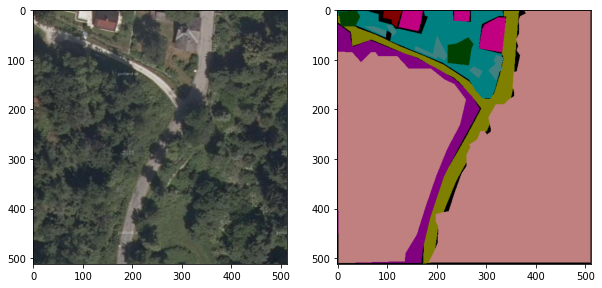

Augmented

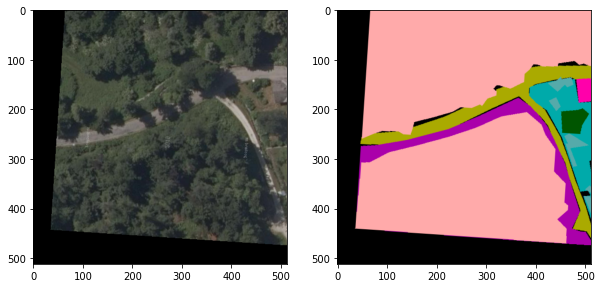

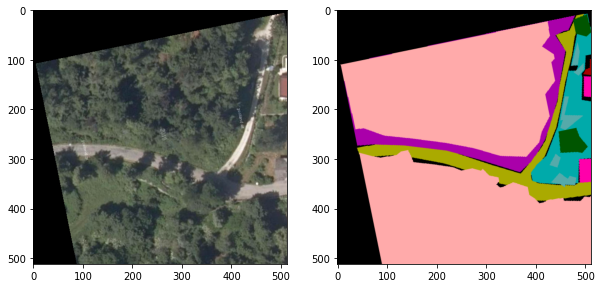

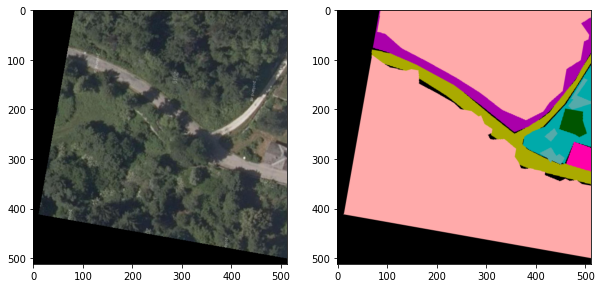

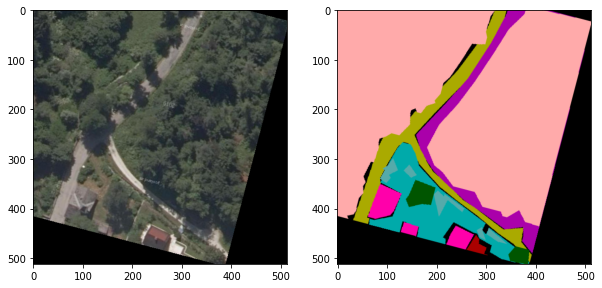

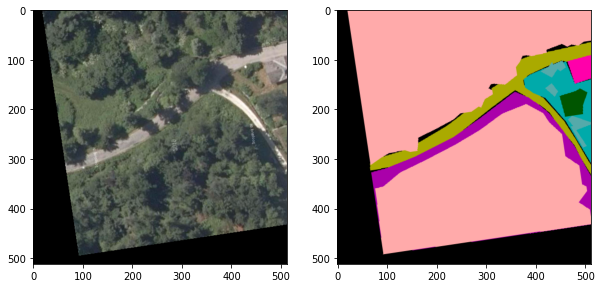

In [0]:
number = 0

image = [f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')][number]
image = np.expand_dims(imread(image)[:, :, :3], axis=0)

mask = [f for f in Path(MASKS_DIR_TRAIN).glob('*.png')][number]
mask = np.expand_dims(imread(mask)[:, :, :3], axis=0)

args = dict(
  vertical_flip=True,  # flip inputs vertically
  horizontal_flip=True,  # flip inputs horizontally
  preprocessing_function=orthogonal_rot,
  width_shift_range=[-0.1, 0.1],  # array of floats of total width
  height_shift_range=[-0.1, 0.1],  # array of floats of total width
  rotation_range=15,  # Int., Degree range for random rotations
  fill_mode='constant', # one of constant, nearest, reflect, wrap
  cval=0, # color to fill if fill_mode = constant
  #zoom_range=[0.7, 1.5],  # float range for random zoom
)

datagen_img = ImageDataGenerator(**args, brightness_range=[0.8, 1.2])
datagen_mask = ImageDataGenerator(**args, brightness_range=[1, 1]) # keep brightness in masks

data_gen_img_it = datagen_img.flow(image, seed=42)
data_gen_msk_it = datagen_mask.flow(mask, seed=42)

print("Original")
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axes[0].imshow(image[0].astype('uint8'))
axes[1].imshow(mask[0].astype('uint8'))
plt.show()

print('Augmented')
for i in range(5):
    img = data_gen_img_it.next()
    msk = data_gen_msk_it.next()
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
    axes[0].imshow(img[0].astype('uint8'))
    axes[1].imshow(msk[0].astype('uint8'))
    plt.show()


In [0]:
print(len([f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')]))

augment_pictures(IMAGES_DIR_TRAIN, MASKS_DIR_TRAIN, aug_per_img=5)

print(len([f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')]))

254
1524

### _Exercise:_

* _What other augmentations are available through Keras ImageDataGenerator or in General?_
* _Are there certain augmentations that might not make sense for our use case?_
* _Apart from such augmentations, what other methods might be an option to increase our data?_
* _How can we call the ImageDataGenerator directly from the model instead of saving it to disk?_

_In the first session we did not use the png masks, but the annotations.json file. If we also want to use the augmented png masks in the other session, the way the masks are loaded there (for mrcnn) needs to be changed_

In [0]:
X_train = load_images([f for f in Path(IMAGES_DIR_TRAIN).glob('*.jpg')], IMAGE_SIZE)
X_val = load_images([f for f in Path(IMAGES_DIR_VAL).glob('*.jpg')], IMAGE_SIZE)

y_train = load_masks([f for f in Path(MASKS_DIR_TRAIN).glob('*.png')], colors)
y_val = load_masks([f for f in Path(MASKS_DIR_VAL).glob('*.png')], colors)

In [0]:
y_train.shape

Out[47]: (1524, 512, 512, 17)

# Unet-Model


Paper: https://arxiv.org/pdf/1505.04597.pdf

In [0]:
def DiceLoss(y_true, y_pred, smooth=1):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true * y_pred)
  return 1-((2. * intersection + smooth) / (K.sum(y_true) + K.sum(y_pred) + smooth))

def DiceLoss_square(y_true, y_pred, smooth=1):
  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(K.abs(y_true_f * y_pred_f))
  return 1-((2. * intersection + smooth) / (K.sum(K.square(y_true_f),-1) + K.sum(K.square(y_pred_f),-1) + smooth))

In [0]:
def IOU_coef(y_true, y_pred):
  #make all values > 0.5 a 1 and all others a 0
  y_pred = tf.cast((y_pred > 0.5), dtype=tf.float32)
  #y_pred = tf.math.multiply(tf.math.greater(y_pred, 0.5),1.0)

  y_true_f = K.flatten(y_true)
  y_pred_f = K.flatten(y_pred)
  intersection = K.sum(y_true_f * y_pred_f)
  return (intersection + 1.0) / (K.sum(y_true_f) + K.sum(y_pred_f) - intersection + 1.0)

In [0]:
def conv2d_block(input_tensor, n_filters, kernel_size=3, batchnorm=True):
    # first layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(input_tensor)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    # second layer
    x = Conv2D(filters=n_filters, kernel_size=(kernel_size, kernel_size), kernel_initializer="he_normal",
               padding="same")(x)
    if batchnorm:
        x = BatchNormalization()(x)
    x = Activation("relu")(x)
    return x

In [0]:
def get_unet(input_img, n_labels, n_filters=16, dropout=0.5, batchnorm=True):
    # contracting path
    c1 = conv2d_block(input_img, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    p1 = MaxPooling2D((2, 2)) (c1)
    p1 = Dropout(dropout*0.5)(p1)

    c2 = conv2d_block(p1, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)
    p2 = MaxPooling2D((2, 2)) (c2)
    p2 = Dropout(dropout)(p2)

    c3 = conv2d_block(p2, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)
    p3 = MaxPooling2D((2, 2)) (c3)
    p3 = Dropout(dropout)(p3)

    c4 = conv2d_block(p3, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)
    p4 = MaxPooling2D(pool_size=(2, 2)) (c4)
    p4 = Dropout(dropout)(p4)
    
    c5 = conv2d_block(p4, n_filters=n_filters*16, kernel_size=3, batchnorm=batchnorm)
    
    # expansive path
    u6 = Conv2DTranspose(n_filters*8, (3, 3), strides=(2, 2), padding='same') (c5)
    u6 = concatenate([u6, c4])
    u6 = Dropout(dropout)(u6)
    c6 = conv2d_block(u6, n_filters=n_filters*8, kernel_size=3, batchnorm=batchnorm)

    u7 = Conv2DTranspose(n_filters*4, (3, 3), strides=(2, 2), padding='same') (c6)
    u7 = concatenate([u7, c3])
    u7 = Dropout(dropout)(u7)
    c7 = conv2d_block(u7, n_filters=n_filters*4, kernel_size=3, batchnorm=batchnorm)

    u8 = Conv2DTranspose(n_filters*2, (3, 3), strides=(2, 2), padding='same') (c7)
    u8 = concatenate([u8, c2])
    u8 = Dropout(dropout)(u8)
    c8 = conv2d_block(u8, n_filters=n_filters*2, kernel_size=3, batchnorm=batchnorm)

    u9 = Conv2DTranspose(n_filters*1, (3, 3), strides=(2, 2), padding='same') (c8)
    u9 = concatenate([u9, c1], axis=3)
    u9 = Dropout(dropout)(u9)
    c9 = conv2d_block(u9, n_filters=n_filters*1, kernel_size=3, batchnorm=batchnorm)
    
    outputs = Conv2D(n_labels, (1, 1), activation='softmax') (c9)
    model = Model(inputs=[input_img], outputs=[outputs])
    return model

In [0]:
input_img = Input((IMAGE_SIZE, IMAGE_SIZE, 3), name='img')
model = get_unet(input_img, n_labels, n_filters=16, dropout=0.05, batchnorm=True)

model.compile(optimizer='adam', loss=DiceLoss, metrics=[IOU_coef])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type) Output Shape Param # Connected to 
==================================================================================================
img (InputLayer) [(None, 512, 512, 3) 0 
__________________________________________________________________________________________________
conv2d (Conv2D) (None, 512, 512, 16) 448 img[0][0] 
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 512, 512, 16) 64 conv2d[0][0] 
__________________________________________________________________________________________________
activation (Activation) (None, 512, 512, 16) 0 batch_normalization[0][0] 
__________________________________________________________________________________________________
conv2d_1 (Conv2D) (None, 512, 512, 16) 2320 activation[0][0] 
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 512, 512, 16) 64 conv2d_1[0][0] 
__________________________________________________________________________________________________
activation_1 (Activation) (None, 512, 512, 16) 0 batch_normalization_1[0][0] 
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 256, 256, 16) 0 activation_1[0][0] 
__________________________________________________________________________________________________
dropout (Dropout) (None, 256, 256, 16) 0 max_pooling2d[0][0] 
__________________________________________________________________________________________________
conv2d_2 (Conv2D) (None, 256, 256, 32) 4640 dropout[0][0] 
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 256, 256, 32) 128 conv2d_2[0][0] 
__________________________________________________________________________________________________
activation_2 (Activation) (None, 256, 256, 32) 0 batch_normalization_2[0][0] 
__________________________________________________________________________________________________
conv2d_3 (Conv2D) (None, 256, 256, 32) 9248 activation_2[0][0] 
__________________________________________________________________________________________________
batch_normalization_3 (BatchNor (None, 256, 256, 32) 128 conv2d_3[0][0] 
__________________________________________________________________________________________________
activation_3 (Activation) (None, 256, 256, 32) 0 batch_normalization_3[0][0] 
__________________________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D) (None, 128, 128, 32) 0 activation_3[0][0] 
__________________________________________________________________________________________________
dropout_1 (Dropout) (None, 128, 128, 32) 0 max_pooling2d_1[0][0] 
__________________________________________________________________________________________________
conv2d_4 (Conv2D) (None, 128, 128, 64) 18496 dropout_1[0][0] 
__________________________________________________________________________________________________
batch_normalization_4 (BatchNor (None, 128, 128, 64) 256 conv2d_4[0][0] 
__________________________________________________________________________________________________
activation_4 (Activation) (None, 128, 128, 64) 0 batch_normalization_4[0][0] 
__________________________________________________________________________________________________
conv2d_5 (Conv2D) (None, 128, 128, 64) 36928 activation_4[0][0] 
__________________________________________________________________________________________________
batch_normalization_5 (BatchNor (None, 128, 128, 64) 256 conv2d_5[0][0] 
__________________________________________________________________________________________________
activation_5 (Activation) (None, 128, 128, 64) 0 batch_normali

In [0]:
dbutils.fs.rm("file:/tmp/model", recurse=True)
model_dir = '/tmp/model'
os.mkdir(model_dir)

model_name = "unet_aug_stratSplit_diceloss.h5"
# Path to save after each epoch. Include placeholders that get filled by Keras.
checkpoint_path = os.path.join(model_dir, model_name)

In [0]:
callbacks = [
    EarlyStopping(patience=10, verbose=1),
    ReduceLROnPlateau(factor=0.1, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint(checkpoint_path, verbose=1, save_best_only=True, save_weights_only=False)
]

In [0]:
#model = u_net(IMAGE_SIZE, n_labels)
#print(model.summary())

In [0]:
#model.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(), metrics=keras.metrics.CategoricalAccuracy()) 

model.fit(X_train, y_train, 
          validation_data=(X_val, y_val), 
          batch_size=16,
          epochs=100, 
          callbacks=callbacks)

Epoch 1/100
 1/96 [..............................] - ETA: 57:12 - loss: 0.9481 - IOU_coef: 5.4515e-06 2/96 [..............................] - ETA: 2:35 - loss: 0.9466 - IOU_coef: 5.5732e-06  3/96 [..............................] - ETA: 2:34 - loss: 0.9449 - IOU_coef: 6.6702e-06 4/96 [>.............................] - ETA: 2:31 - loss: 0.9433 - IOU_coef: 3.4793e-05 5/96 [>.............................] - ETA: 2:30 - loss: 0.9417 - IOU_coef: 1.6257e-04 6/96 [>.............................] - ETA: 2:28 - loss: 0.9401 - IOU_coef: 3.7589e-04 7/96 [=>............................] - ETA: 2:27 - loss: 0.9386 - IOU_coef: 6.0999e-04 8/96 [=>............................] - ETA: 2:25 - loss: 0.9372 - IOU_coef: 7.6545e-04 9/96 [=>............................] - ETA: 2:23 - loss: 0.9358 - IOU_coef: 8.8014e-0410/96 [==>...........................] - ETA: 2:22 - loss: 0.9344 - IOU_coef: 9.5510e-0411/96 [==>...........................] - ETA: 2:20 - loss: 0.9331 - IOU_coef: 0.0010 12/96 [==>...........................] - ETA: 2:18 - loss: 0.9318 - IOU_coef: 0.001013/96 [===>..........................] - ETA: 2:17 - loss: 0.9306 - IOU_coef: 0.001114/96 [===>..........................] - ETA: 2:15 - loss: 0.9295 - IOU_coef: 0.001115/96 [===>..........................] - ETA: 2:14 - loss: 0.9283 - IOU_coef: 0.001116/96 [====>.........................] - ETA: 2:12 - loss: 0.9272 - IOU_coef: 0.001117/96 [====>.........................] - ETA: 2:10 - loss: 0.9261 - IOU_coef: 0.001118/96 [====>.........................] - ETA: 2:09 - loss: 0.9250 - IOU_coef: 0.001119/96 [====>.........................] - ETA: 2:07 - loss: 0.9239 - IOU_coef: 0.001120/96 [=====>........................] - ETA: 2:05 - loss: 0.9229 - IOU_coef: 0.001121/96 [=====>........................] - ETA: 2:04 - loss: 0.9218 - IOU_coef: 0.001222/96 [=====>........................] - ETA: 2:02 - loss: 0.9208 - IOU_coef: 0.001223/96 [======>.......................] - ETA: 2:00 - loss: 0.9199 - IOU_coef: 0.001324/96 [======>..

In [0]:
dbutils.fs.ls("file:/tmp/model")

Out[56]: [FileInfo(path='file:/tmp/model/unet_aug_stratSplit_diceloss.h5', name='unet_aug_stratSplit_diceloss.h5', size=26356484)]

In [0]:
str(TEAM_MOUNT.replace('/dbfs', 'dbfs:') + "models/"+model_name)

In [0]:
model_file_path = str([p.path for p in dbutils.fs.ls("file:/tmp/model") if p.name.endswith('.h5') ][0])
dbutils.fs.cp(model_file_path, str(TEAM_MOUNT.replace('/dbfs', '') + "models/"+model_name))

Out[57]: True

In [0]:
dbutils.fs.ls("/mnt/team32storage/models")

Out[58]: [FileInfo(path='dbfs:/mnt/team32storage/models/.init', name='.init', size=0),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_catCE_dropout_02.h5', name='unet_aug_catCE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_cat_CE_dropout_02.h5', name='unet_aug_cat_CE_dropout_02.h5', size=23526908),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_diceloss.h5', name='unet_aug_diceloss.h5', size=26357524),
 FileInfo(path='dbfs:/mnt/team32storage/models/unet_aug_stratSplit_diceloss.h5', name='unet_aug_stratSplit_diceloss.h5', size=26356484)]

In [0]:
dbutils.fs.rm("file:/tmp/model", recurse=True)

Out[67]: True

### Running our Model

In [0]:
images_paths = [f for f in Path('/dbfs/mnt/sdscdata/data/raw/test').glob('*.jpeg')]
X = load_images(images_paths, IMAGE_SIZE)

#u_net_model_inf = u_net(IMAGE_SIZE, n_labels)
#u_net_model_inf.load_weights(str(TEAM_MOUNT + "models/latest_unet.h5"))
model_name = 'unet_aug_diceloss.h5'
model = load_model(str(TEAM_MOUNT+"models/"+model_name), compile=False)

results = {}
for image in images_paths:
  X = np.expand_dims(imread(image)[:, :, :3], axis=0)
  results[image.stem] = { 
    'Img': image,
    'mask': np.squeeze(model.predict(X, verbose=1))
  }

1/1 [==============================] - ETA: 0s1/1 [==============================] - 2s 2s/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 25ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 19ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 18ms/step
1/1 [==============================] - ETA: 0s1/1 [==============================] - 0s 20ms/step
1/1 [==============================] - ETA: 0s

In [0]:
sample_key = list(results.keys())[96]
print(results[sample_key]['mask'].shape)
results[sample_key]['mask'][:,:,0]

(512, 512, 17)
Out[33]: array([[0.42743066, 0.6756474 , 0.70412576, ..., 0.73416615, 0.6668547 ,
 0.4937815 ],
 [0.5591991 , 0.84168965, 0.8682953 , ..., 0.8662714 , 0.86747706,
 0.6876338 ],
 [0.6768035 , 0.8490488 , 0.8552408 , ..., 0.8583123 , 0.87713623,
 0.7284695 ],
 ...,
 [0.5516541 , 0.77765185, 0.8419888 , ..., 0.86391157, 0.8998205 ,
 0.7463418 ],
 [0.56748825, 0.7872232 , 0.8421388 , ..., 0.85802084, 0.8777568 ,
 0.7201226 ],
 [0.3472227 , 0.58903015, 0.66678756, ..., 0.6602305 , 0.66176766,
 0.46028593]], dtype=float32)

In [0]:
confidence = 0.05
for key in results.keys():
    # define at which confidence we take it as a class (and not as BG)
    results[key]['mask_l'] = np.where(results[key]['mask'] >= confidence, 1, 0)
    
    # Aggregate all layers to one, if we have multiple labels for the same pixel, we take the highest based on the label order (17 > 1)
    results[key]['predicted_mask'] = convert_to_one_labelmatrix(results[key]['mask_l'], labels).astype(int)

### Exercise

* Test different confidences and see how it affects the images
* Is one confidence for all classes enough, or might it be better to apply different confidence to different classes
* still, as in the previous session, the aggregation method is very simple, there might be better approaches

### Exercises

* What comparisons can we draw compared to the output of the first model
* Are there any areas/classes which might perform better in of the models compared to the other
* If so could we use that to our advantage?

In [0]:
for result in results.keys():
  results[result] = score_calculation(results[result], weather.values.tolist(), label_scores)

In [0]:
final_result = {}
for result in results.keys():
  final_result[result] = { your_key: results[result][your_key] for your_key in ["predicted_mask", "emmission_score", "solar_score", "biodiversity_score"] }
  final_result[result]["predicted_mask"] = final_result[result]["predicted_mask"].tolist()

In [0]:
# save final results to result_dir (to be picked up for score/ leadeboard calculation)
final_result_path = str(str(TEAM_MOUNT) + f"data/results/{datetime.datetime.now():%Y%m%d_%H%M}.json")
# Serialize data into file:
with open(final_result_path, "w") as f:
  json.dump(final_result, f)                                                                                                                                                                                                                                                                                                                              